<Body>   
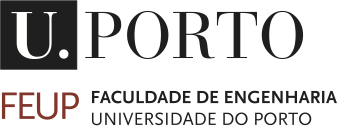   
<h1> <b>Control and Optimization 2023/2024 (2<sup>nd</sup> semester) </b> </h1>
<p>Master in Electrical and Computer Engineering </p>
<p>Department of Electrical and Computer Engineering</p>
</Body>  

**A. Pedro Aguiar** (pedro.aguiar@fe.up.pt), **M. Rosário Pinho** (mrpinho@fe.up.pt)



FEUP, Fev. 2024

---


# **Notebook #06: Backstepping control**

## **Activity 1**

Consider the following nonlinear system
$$
\dot x = x^2 - x^3 + u \tag{1}
$$
where $x\in\mathbf{R}$ is the state and $u\in\mathbf{R}$ is the input.



**1.1**
Given a desired reference signal $x_d(t)$ and its derivative $\dot x_d(t)$, design a feedback law for (1) such that $x(t)$ converges to $x_d(t)$ as $t\to\infty$ and the tracking error $\tilde x = x-x_d$  at the origin is GAS. Use the control Lyapunov function $V = \frac{1}{2} \tilde x^2$.

**1.2**
Confirm the results through simulation by plotting the **time-evolution** of the state $x(t)$ and the tracking error $\tilde x(t)$ for the desired reference signal $x_d(t) = \sin(t)$.

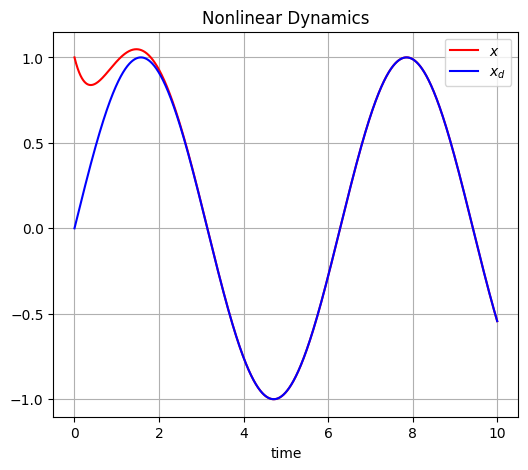

In [2]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

def step_f(x,xd,dotxd,dt):
  K=2
  u = -x**2 + x**3 + dotxd - K*(x-xd)
  return x+(x**2-x**3+u)*dt


#Sample-time
dt = 0.001
t_end=10
t = np.linspace(0, t_end,  1000)
# Simulate the system
t_signal = np.arange(0,t_end,dt) # time samples

w=1
x1_signal = np.zeros_like(t_signal)
xd_signal= np.sin(w*t_signal)
xddot_signal=w*np.cos(w*t_signal)

#Initial conditions of our system
x1_signal[0] = 1



# Iteration
for i in range(0,t_signal.shape[0]-1):
    x1_signal[i+1] = step_f(x1_signal[i],xd_signal[i],xddot_signal[i],dt)

#plot
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig.add_subplot(1,2,1)


ax1.plot(t_signal, x1_signal, 'r-', label='$x$')
ax1.plot(t_signal, xd_signal, 'b-', label='$x_d$')
ax1.set_title("Nonlinear Dynamics")
ax1.set_xlabel("time")
ax1.grid()
ax1.legend(loc='best')

## **Activity 2**

Consider the following nonlinear system
$$
\begin{align*}
\dot x_1 &= x_1^2 - x_1^3 + x_2 \tag{2a} \\
\dot x_2 &= u \tag{2b}
\end{align*}
$$
where $x\in\mathbf{R^2}$ is the state and $u\in\mathbf{R}$ is the input.



**2.1**
Given a desired reference signal $x_d(t)$ and its derivatives $\dot x_d(t)$, $\ddot x_d(t)$, design a feedback law for (2) such that $x_1(t)$ converges to $x_d(t)$ as $t\to\infty$ and the tracking error $\tilde x = (x_1-x_d, \tilde x_2)^\top$ (for some suitable $\tilde x_2$) at the origin is GAS.

**2.2**
Confirm the results through simulation by plotting the **time-evolution** of the state $x(t)$ and the tracking error $\tilde x(t)$ for the desired reference signal $x_d(t) = \sin(t)$.

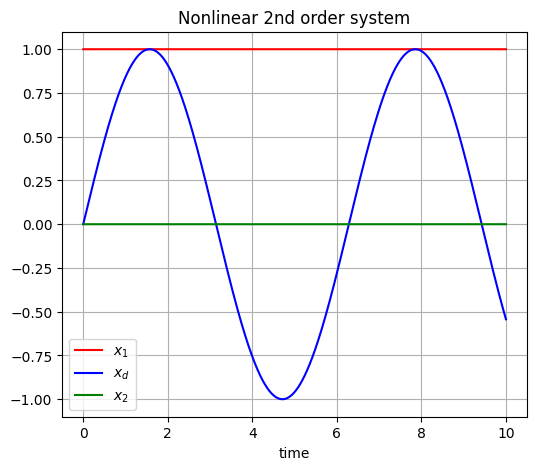

In [4]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

# TODO: dot_phi is not correct

def step_f(x,xd,dotxd,dotdotxd,dt):
  K1=1
  K2=1
  tilde_x1 = x[0]-xd
  phi = -x[0]**2+x[0]**3+dotxd-K1*tilde_x1
  dot_phi = (-2*x[0]+3*x[0]**2)*(x[0]**2-x[0]**3+x[1]) + dotdotxd - K1*(x[0]-xd)
  z = x[1]-phi
  u = -K1*tilde_x1-K2*dot_phi+dotdotxd
  return ([ x[0]+(x[0]**2-x[0]**3+x[1])*dt,
           x[1]+ u*dt
                   ])


#Sample-time
dt = 0.001
t_end=10
t = np.linspace(0, t_end,  1000)
# Simulate the system
t_signal = np.arange(0,t_end,dt) # time samples

w=1
x1_signal = np.zeros_like(t_signal)
x2_signal = np.zeros_like(t_signal)
xd_signal= np.sin(w*t_signal)
xddot_signal=w*np.cos(w*t_signal)
xdotdot_signal=-w**2*np.sin(w*t_signal)

#Initial conditions of our system
x1_signal[0] = 1

# Iteration
for i in range(0,t_signal.shape[0]-1):
    x1_signal[i+1],x2_signal[i+1] = step_f((x1_signal[i],x2_signal[i]),xd_signal[i],xddot_signal[i],xdotdot_signal[i],dt)

#plot
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig.add_subplot(1,2,1)


ax1.plot(t_signal, x1_signal, 'r-', label='$x_1$')
ax1.plot(t_signal, xd_signal, 'b-', label='$x_d$')
ax1.plot(t_signal, x2_signal, 'g-', label='$x_2$')
ax1.set_title("Nonlinear 2nd order system")
ax1.set_xlabel("time")
ax1.grid()
ax1.legend(loc='best')


## **Activity 3**

Do the same, but now for the following nonlinear system
$$
\begin{align*}
\dot x_1 &= x_1^2 - x_1^3 + x_2 \tag{3a} \\
\dot x_2 &= x_1 + \sin x_2 + x_3 \tag{3b} \\
\dot x_3 &= u \tag{3c}
\end{align*}
$$
where $x\in\mathbf{R^3}$ is the state and $u\in\mathbf{R}$ is the input.

